# MU4MA077, Base d'analyse de donnée, 2024-2025
# Données sous forme de graphe

<div style="text-align: right"> 
Sorbonne Université, Master 1
</div>

<div style="text-align: right"> 
Merci à Catherine Matias, Nicolas Jouvin et aux autres collègues dont j'ai pu m'inspirer pour construire ce TP
</div>

# Table of contents
1. [Introduction à la manipulation de graphe](#part1)
    - [Premier pas en manipulation de graphe](#part1sec1)
    - [Transformation d'un problème ouvert en problème de graphe](#part1sec2)
    - [Quelques éléments d'anlayse descriptive](#part1sec3)
    - [Algorithme du plus court chemin](#part1sec4)
2. [Clustering de noeuds dans un graphe](#part2)
    - [Clustering spectrale](#partsec1)
    - [Algorithme de clustering à base d'arbre couvrant](#part2sec2)
3. [Quelques modèles de graphes aléatoires](#part3)
   - [Transformation d'une matrice aléatoire en graphe](#part3sec1)
   - [Modèles de Erdos Renyi](#part3sec2)
3. [Quelques exercices](#part4)
    - [Exercice 1](#part4sec1)
    - [Exercice 2](#part4sec2)
    - [Exercice 3](#part4sec3)

In [ ]:
import networkx as nx
import atplotlib.pyplot as plt
fro networkx.algorithms import bipartite
import requests
import gzip
import io
import math
import re
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from scipy.sparse.csgraph import minimum_spanning_tree
import pandas as pd

# Introduction à la manipulation de graphe <a id="part1"></a>

Dans cette première partie du TP, nous allons nous familiariser avec les outils de traitement de graphes en Python, notamment ``networkx``. Ensuite, nous reviendrons sur les concepts clés de l’analyse descriptive des graphes abordés en cours, en explorant les différents types de graphes possibles (réseaux sociaux, réseaux routiers, modélisation de problèmes réels, etc.) ainsi que leurs propriétés.


## Premier pas en manipulation de graphe <a id="part1sec1"></a>

On va tout d'abords introduire les bases de la manipulation de graphe. En particulier, nous utiliserons le package ``networkx``. Cependant, nous ne présenterons pas toutes les fonctionnalités de ce package. Pour une introduction plus complète, veuillez vous référer à ce [tutoriel](https://networkx.org/documentation/stable/tutorial.html). Commencons donc par une construction simple de graphe, en utilisant des exemples tirés du cours:


Voici comment créer un graphe depuis un dictionnaire. Lancez le code, et modifiez le pour bien le comprendre. Ensuite, vérifiez que l'encodage correspond bien à la représentation vue en cours. Relancez plusieurs fois la visualisation et commentez vos observations.



Graphe dirigé : {'A': ['B', 'D'], 'B': ['D', 'C'], 'C': [], 'D': ['C']}
Graphe non dirigé : {'1': ['2', '3'], '2': ['1', '3', '4'], '3': ['1', '4'], '4': ['2', '3']}


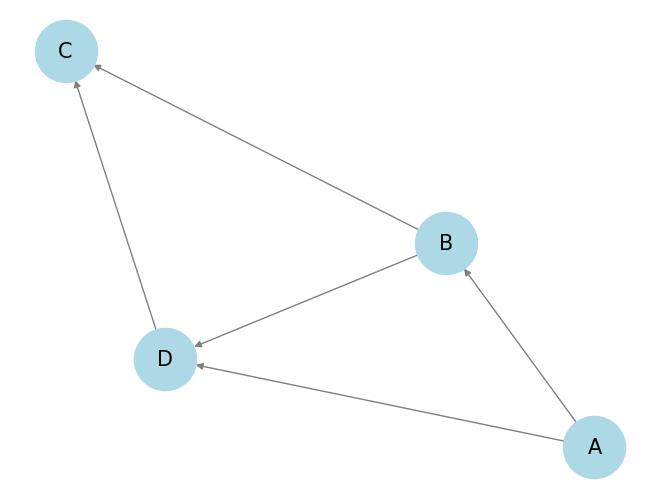

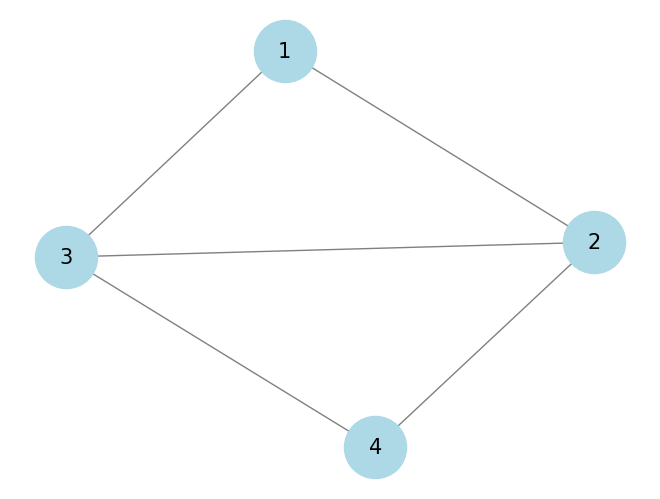

In [3]:
# Les dictionnaires

graph_dirige = {
    'A': ['B', 'D'],
    'B': ['D', 'C'],
    'C': [],
    'D': ['C'],
}

graph_non_dirige = {
    '1': ['2', '3'],
    '2': ['1', '3', '4'],
    '3': ['1', '4'],
    '4': ['2', '3'],
}

print("Graphe dirigé :", graph_dirige)
print("Graphe non dirigé :", graph_non_dirige)


# Transformation en graphes networkx et visualisation 

Gnetx_dirige = nx.DiGraph(graph_dirige)
Gnetx_non_dirige = nx.Graph(graph_non_dirige)

nx.draw(Gnetx_dirige,with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

nx.draw(Gnetx_non_dirige,with_labels=True,  node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

**Remarque :** À chaque fois que l'on relance la visualisation, le placement des nœuds change.  C'est parce que l'algorithme de visualisation est aléatoire. Comme vu en cours, seul l'encodage du graphe et ses propriétés sont stables. Il peut y avoir une infinité de visualisations pour un même graphe, et cela dépend de l'algorithme de visualisation utilisé.


<b style="color:red"> À vous de jouer :</b> Maintenant que nous avons compris comment construire des graphes, et en vous référant au cours pour trouver les définitions appropriées, tracez les graphes suivants

- Une chaîne 
- Un chemin  
- Un graphe complet à 4 nœuds  
- Un graphe bipartite à 5 nœuds  
- Un arbre

Consultez la documentation de `networkx` et refaites cet exercice  
en utilisant des méthodes comme **add_node** ou **add_edge**.


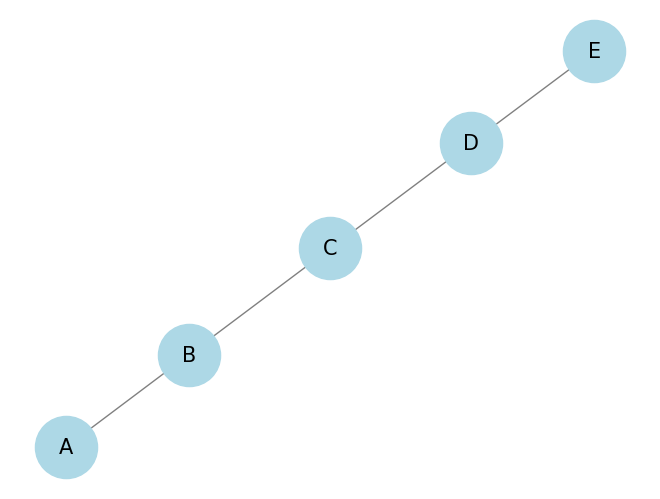

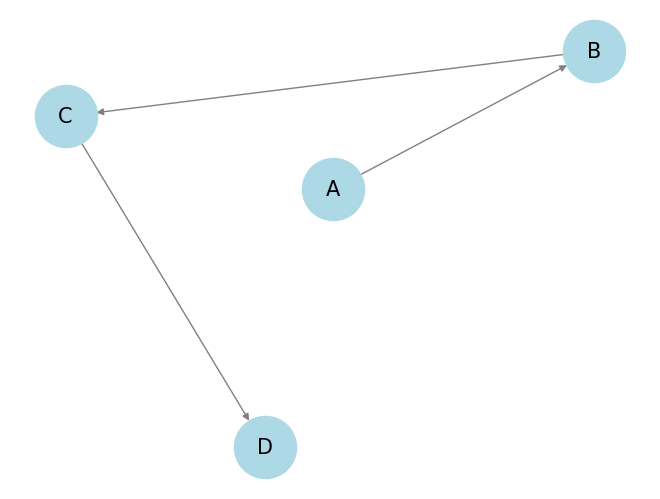

In [4]:
#CHAINE ET CHEMIN

chaine = {
    'A' : ['B'],
    'B' : ['A','C'],
    'C' : ['B','D'],
    'D' : ['C'],
}
g_chaine = nx.Graph(chaine)
g_chaine.add_node('E')
g_chaine.add_edge('D','E')

chemin = {
    'A' : ['B'],
    'B' : ['C'],
    'C' : ['D'],
}
g_chemin = nx.DiGraph(chemin)

nx.draw(g_chaine,with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

nx.draw(g_chemin,with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()


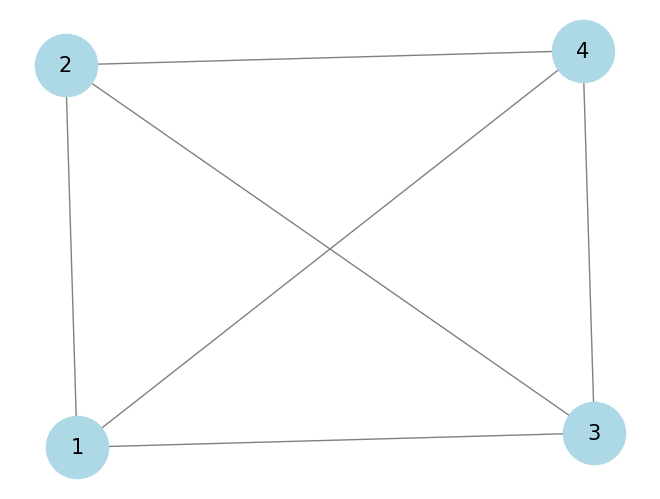

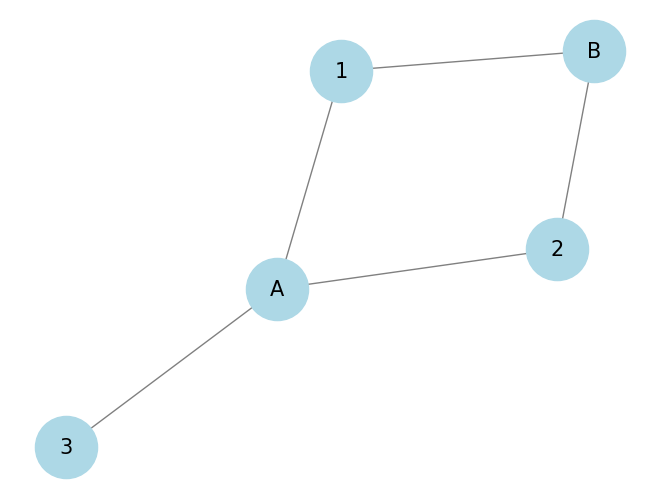

In [9]:
#COMPLET 4 NODES et BIPARTITE 5 NODE

complete = {
    '1' : ['2','3','4'],
    '2' : ['1','3','4'],
    '3' : ['1','2','4'],
    '4' : ['1','2','3'],
}
g_complete = nx.Graph(complete)

bipartite = {
    'A' : ['1','2','3'],
    'B' : ['1','2'],
    '1' : ['A','B'],
    '2' : ['A','B'],
    '3' : ['A'],
}
g_bipartite = nx.Graph(bipartite)

nx.draw(g_complete,with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

nx.draw(g_bipartite,with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

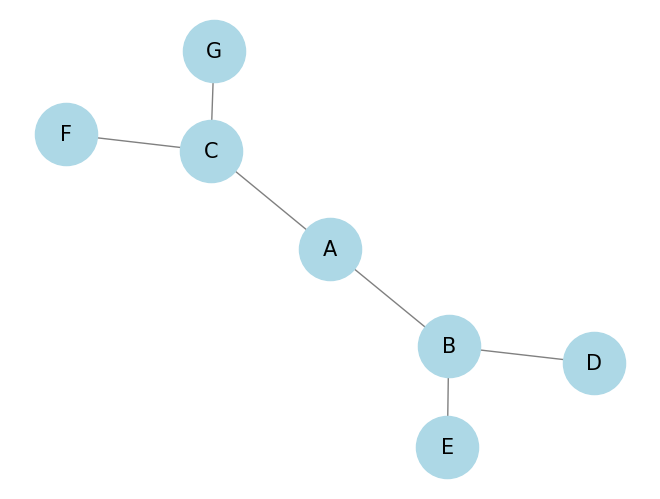

In [10]:
#UN ARBRE

arbre = {
    'A' : ['B','C'],
    'B' : ['D','E'],
    'C' : ['F','G'],
}
nx.Graph(arbre)

nx.draw(nx.Graph(arbre),with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

**Remarque sur la visualisation et l'identitification de graphes bipartites:** Comme vous avez sûrement pu l'observer, la visualisation proposée pour le graphe bipartite que vous avez créé ne correspond pas à celle vue en cours. En fait, pour obtenir une telle partition, il faut indiquer à `networkx` que votre graphe est bipartite. `networkx` ne dispose pas d'une classe spécifique pour les graphes bipartites,  
mais les classes `Graph()` ou `DiGraph()` peuvent être utilisées pour les représenter.  Cependant, vous devez garder une trace de l'ensemble auquel appartient chaque nœud et vous assurer qu'il n'y a pas d'arête entre les nœuds d'un même ensemble. Pour cela, on utilise la fonction `bipartite.set` comme ceci :

{'A', 'D', 'C'}
{'E', 'B'}


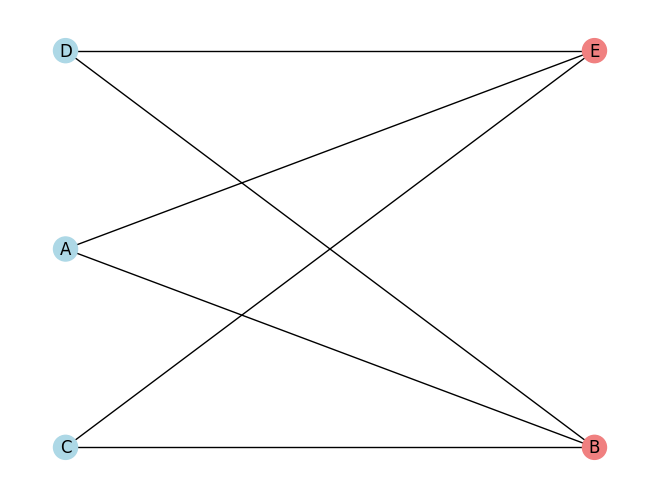

In [10]:
bipart = {
    'A': ['B'],
    'B': ['C' ,'D'],
    'C': ['B', 'E'],
    'D': ['E'],
    'E': ['A']
}
B=nx.Graph(bipart)

nx.is_connected(B) # on vérifie que le graphe est connecté

bottom_nodes, top_nodes = bipartite.sets(B) # on sépare les noeds en deux groupes dons les graphes induits sont vides 
print(bottom_nodes)
print(top_nodes)

# On indique a la fonction de visualisation que le graphe est bipartite et on indique un ensemble de noeds référence
pos = nx.bipartite_layout(B, nodes= ['C', 'A', 'D'])  
# pos = nx.bipartite_layout(B, nodes= top_nodes)  

nx.draw(B, pos, with_labels=True, node_color=['lightblue' if n in ['C', 'A', 'D'] else 'lightcoral' for n in B.nodes()])
plt.show()

## Transformation d'un problème de ouvert en problème de graphe <a id="part1sec2"></a>

Comme nous l'avons vu en classe, la théorie des graphes est une théorie très polyvalente qui peut être utilisée pour formaliser un large éventail de problèmes de la vie réelle, des réseaux de communication aux transports publics, en passant par l'analyse des réseaux de protéines. Pour illustrer notre propos, voici un problème concret issu de la serie [Friends](https://en.wikipedia.org/wiki/Friends) (oui référence à l'ancienne je sais).  

**Problème:** Imaginez un groupe de sept amis : Rachel, Monica, Ross, Chandler, Janice, Joe et Phoebe. Ils vivent à New York et prévoient de louer deux voitures pour partir en vacances en Floride. Cependant, passer 18 heures de voyage ensemble peut s'avérer problématique si les passagers des deux véhicules ne sont pas soigneusement choisis. En effet, il faut savoir que :

- Rachel et Ross viennent de rompre, il ne serait donc pas judicieux qu'ils voyagent ensemble.
- Joe a fait des avances à Rachel, ce qui a créé des tensions entre lui et Ross.
- Phoebe semble vouloir attirer l'attention de Joe, ce qui a creusé un fossé entre elle et Rachel.
- Chandler a pris la place de capitaine de l'équipe de football à Joe, ce qui suscite un certain ressentiment.
- Monica et Chandler sont jaloux de Janice, car elle attend un bébé alors qu'ils n'arrivent pas à en avoir un.
- Ross et Janice ont une histoire compliquée, les mettre ensemble dans un espace restreint n'est jamais une très bonne idée.
- Enfin, Monica pense que Joe est un abruti.

Formulez ce problème sous forme de graphe en tenant compte des contraintes de chacun. Visualisez ce graphique et déterminez si une solution naturelle apparaît. 

<b style="color:red"> Réponse: </b>  On va établir une connexion entre chaque paire d'individus qui ne peuvent pas voyager ensemble. Si le graphe obtenu est bipartite, alors, par définition, il est possible de diviser les amis en deux groupes dans lesquels aucune connexion interne n'existe, garantissant ainsi l'absence de tensions.

```



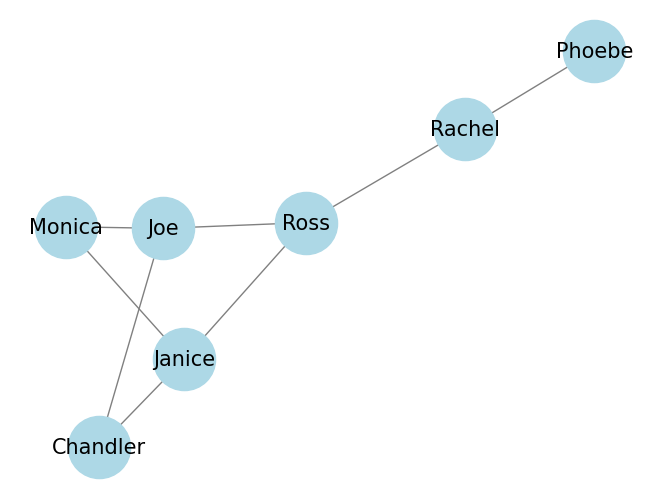

Le graphe est bipartite : True


In [16]:
friends = {
    'Rachel' : ['Ross', 'Phoebe'],
    'Ross' : ['Rachel', 'Joe', 'Janice'],
    'Joe' : ['Ross', 'Chandler', 'Monica'],
    'Phoebe' : ['Rachel'],
    'Chandler' : ['Joe', 'Janice'],
    'Janice' : ['Monica', 'Chandler', 'Ross'],
    'Monica' : ['Janice', 'Joe']
}

G = nx.Graph(friends)
nx.draw(G,with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.show()

is_bipartite = nx.is_bipartite(G)
print(f"Le graphe est bipartite : {is_bipartite}")

## Quelques éléments d'analyse descriptive <a id="part1sec3"></a>

Pour introduire quelques éléments d'analyse descriptive, nous allons utiliser un graphe réel vu en cours: le graphe des connexions Facebook, disponible sur la plateforme de jeux de données de graphes de l'université de Stanford. Cet ensemble de données est constitué de listes d'amis Facebook. Les données ont été anonymisées en remplaçant les identifiants internes de Facebook par de nouvelles valeurs. Le code ci-dessous récupère le graphe en question et le stocke dans un objet `networkx`, nommé **G**.  


In [5]:
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
print("Downloading dataset...")

response = requests.get(url)
if response.status_code != 200:
    raise Exception("Failed to download the dataset.")

compressed_file = io.BytesIO(response.content)
with gzip.open(compressed_file, mode='rt') as f:
    G = nx.read_edgelist(f, nodetype=int)
    
print("Dataset loaded. Total nodes:", G.number_of_nodes(), "Total edges:", G.number_of_edges())

Dataset loaded. Total nodes: 4039 Total edges: 88234


Parce que travailler avec le graphe complet peut être fastidieux (car il est relativement volumineux), nous allons nous concentrer sur le sous-graphe induit par les 200 premiers nœuds de la liste des nœuds de **G**.  

<b style="color:red"> À vous de jouer : </b> Construisez le sous-graphe induit dont nous venons de parler et représentez-le avec la fonction **draw**. Pour recupérer la listes des noeuds d'un graphe, on utilisera la méthode **.nodes()** et pour créer le sous graphe induit, on utilisera la méthode **.subgraph()**. Ensuite calculez les indicateurs statistiques suivants (en les réimplémentant ou en utilisant les fonctions ``neworkx`` associées): 

- Distribution des degrés
- Coefficient de transitivité moyen
- Centralité (closeness) des noeuds $0$, $189$, $26$ et $11$. 

Commentez. Le graphe est-il petit monde? Comment peut on le vérifer en général?


Nombre de noeuds : 200
Distribution des degrés : [199, 11, 5, 11, 5, 8, 4, 10, 4, 33, 4, 1, 1, 16, 9, 1, 5, 9, 1, 9, 9, 35, 6, 11, 10, 39, 38, 3, 9, 7, 7, 13, 4, 2, 2, 2, 6, 1, 5, 10, 18, 15, 2, 1, 4, 7, 4, 1, 14, 2, 6, 6, 2, 15, 6, 11, 41, 7, 3, 8, 3, 3, 15, 2, 6, 6, 10, 43, 5, 8, 1, 1, 14, 8, 1, 7, 2, 3, 4, 8, 12, 1, 20, 6, 6, 8, 3, 6, 15, 5, 2, 4, 12, 6, 10, 4, 4, 2, 25, 8, 6, 9, 3, 9, 18, 8, 4, 3, 8, 18, 3, 7, 3, 26, 1, 14, 12, 3, 16, 37, 2, 8, 31, 11, 4, 4, 5, 9, 16, 4, 8, 4, 9, 10, 12, 5, 13, 9, 2, 5, 8, 16, 25, 8, 11, 2, 6, 4, 14, 9, 8, 5, 3, 1, 1, 3, 8, 3, 14, 8, 1, 13, 4, 5, 2, 8, 3, 4, 6, 24, 23, 7, 18, 5, 3, 10, 11, 8, 5, 3, 12, 5, 2, 2, 10, 15, 24, 9, 25, 6, 3, 3, 4, 4, 11, 4, 6, 9, 2, 22]
Degré moyen : 9.62
Transitivité : 0.21591048061636298
Centralité de closeness : {0: 1.0, 1: 0.5142118863049095, 2: 0.5063613231552163, 3: 0.5142118863049095, 4: 0.5063613231552163, 5: 0.5102564102564102, 6: 0.5050761421319797, 7: 0.5128865979381443, 8: 0.5050761421319797, 9: 0.54520547945

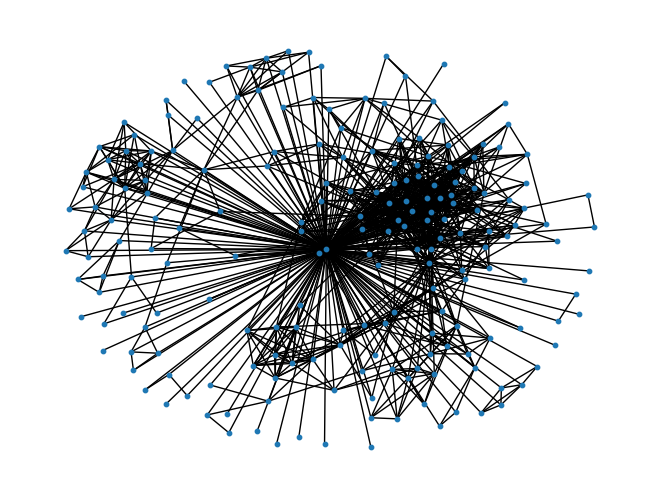

In [6]:
#Obtention de la liste des noeuds
list_nodes = list(G.nodes)
list_nodes = list_nodes[:200]

subG = G.subgraph(list_nodes)
print("Nombre de noeuds :", subG.number_of_nodes())

degree_distribution = [d for n, d in subG.degree()]
print("Distribution des degrés :", degree_distribution)
print("Degré moyen :", np.mean(degree_distribution))

transitivity = nx.transitivity(subG)
print("Transitivité :", transitivity)

closeness = nx.closeness_centrality(subG)
print("Centralité de closeness :", closeness)
nodes_to_check = [0, 189, 26, 11]
for node in nodes_to_check:
    if node in closeness:
        print(f"Centralité (closeness) du nœud {node} :", closeness[node])
    else:
        print(f"Le nœud {node} n'existe pas dans le sous-graphe.")

avg_shortest_path_length = nx.average_shortest_path_length(subG)
print("Longueur moyenne des plus courts chemins :", avg_shortest_path_length)

nx.draw(subG, node_size=10)



<b style="color:red"> Réponse: </b> 


C'est petit monde, en effet on est largment logarithmique en 200


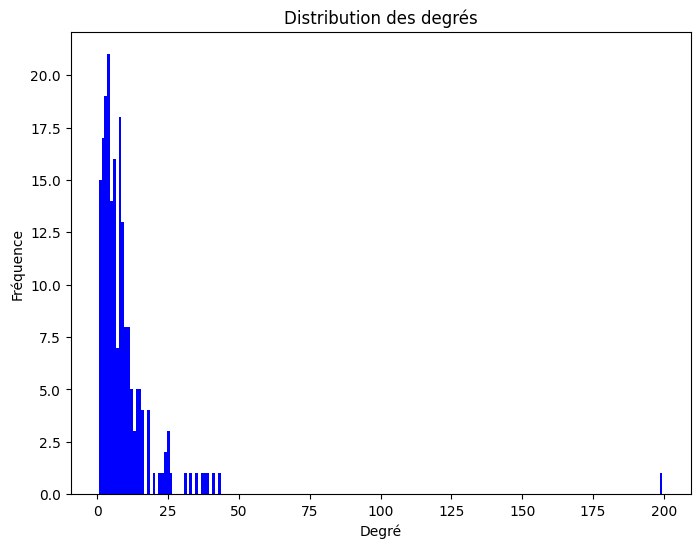

Coefficient de transitivité moyen : 0.6563925617700275
Centralité de proximité des noeuds choisis:
Noeud 0: 1.0
Noeud 189: 0.5076530612244898
Noeud 26: 0.5527777777777778
Noeud 11: 0.5012594458438288


In [7]:
# Calcule à la main de la distribution des degrés
degree_sequence = [subG.degree(n) for n in subG.nodes()]
degree_count = {}

for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1


# Représentation en barplot de la distribution des degrés

plt.figure(figsize=(8, 6))
plt.bar(degree_count.keys(), degree_count.values(), width=1, color='b')
plt.title("Distribution des degrés")
plt.xlabel("Degré")
plt.ylabel("Fréquence")
plt.show()


# Coefficient de trasitivité moyen et Centralité (closeness) des noeuds avec netwokx

clustering_global = nx.average_clustering(subG) 
print(f"Coefficient de transitivité moyen : {clustering_global}")

nodes=[0, 189, 26, 11]
closeness_centrality = nx.closeness_centrality(subG)
print(f"Centralité de proximité des noeuds choisis:")
for node in nodes:
    print(f"Noeud {node}: {closeness_centrality[node]}")

**Changeons à présent de jeu de données:** Nous allons étudier un réseau routier de Californie, disponible [ici](https://snap.stanford.edu/data/roadNet-CA.txt.gz). Dans ce graphe, les intersections et les extrémités sont représentées par des nœuds, et les routes reliant ces intersections ou ces extrémités sont représentées par des arêtes non dirigées.  

In [8]:
url = "https://snap.stanford.edu/data/roadNet-CA.txt.gz"
print("Downloading dataset...")

response = requests.get(url)
if response.status_code != 200:
    raise Exception("Failed to download the dataset.")

compressed_file = io.BytesIO(response.content)
with gzip.open(compressed_file, mode='rt') as f:
    G = nx.read_edgelist(f, nodetype=int)
    
print("Dataset loaded. Total nodes:", G.number_of_nodes(), "Total edges:", G.number_of_edges())


Dataset loaded. Total nodes: 1965206 Total edges: 2766607


<b style="color:red"> À vous de jouer: </b> Adaptez le code précédent pour représenter du sous graphe induit par les 200 premiers noeuds de ce graphe. Calculez sa distribution de degré et son coefficient de transitivité moyen.  


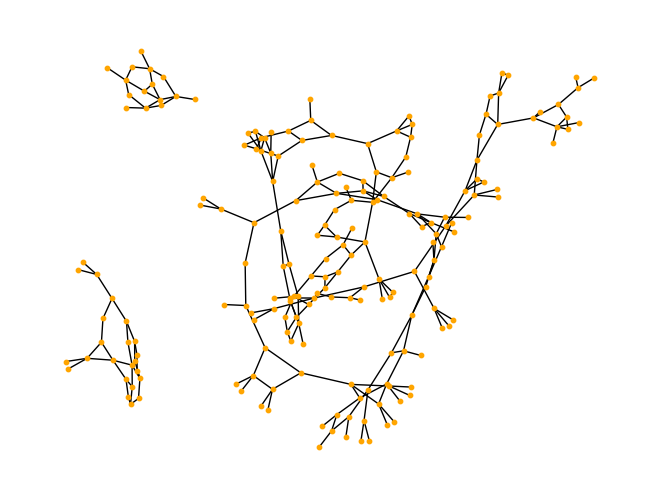

In [9]:
#Obtention de la liste des noeuds
list_nodes = list(G.nodes)
list_nodes = list_nodes[:200]

subG = G.subgraph(list_nodes)

nx.draw(subG, node_size = 10, node_color='orange', edge_color='black', font_size=15)

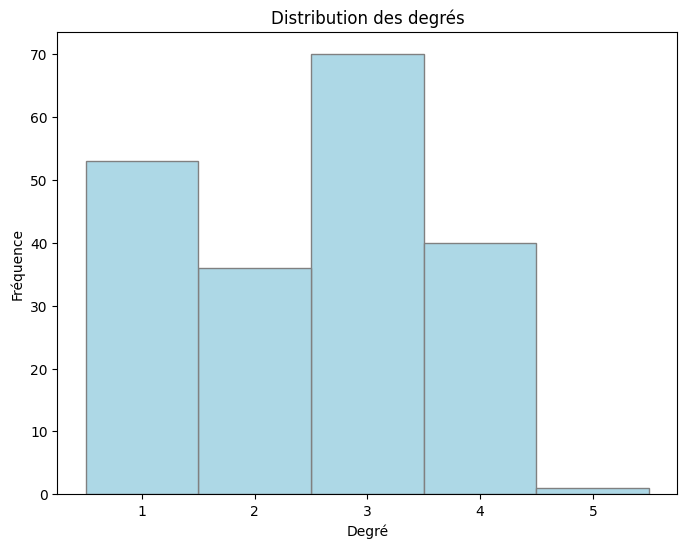

In [10]:
# Calcule à la main de la distribution des degrés
degree_sequence = [subG.degree(n) for n in subG.nodes()]
degree_count = {}

for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

plt.figure(figsize=(8, 6))
plt.bar(degree_count.keys(), degree_count.values(), width=1, color='lightblue', edgecolor='grey')
plt.title("Distribution des degrés")
plt.xlabel("Degré")
plt.ylabel("Fréquence")
plt.show()

In [11]:
# Coefficient de trasitivité moyen 
transitivity = nx.transitivity(subG)
print("Transitivité :", transitivity)

Transitivité : 0.12701612903225806


## Algorithms du plus court chemin <a id="part1sec4"></a>

Pour conclure cette première partie, nous allons nous intéresser à un dernier outil de statistique descriptive sur les graphes : le plus court chemin entre des nœuds. Pour rendre ce concept plus concret, nous allons résoudre un problème de la vie courante :
trouver l'itinéraire le plus court entre deux stations de métro parisiennes. La RATP propose un service interactif permettant aux usagers de trouver le trajet le plus court entre deux stations. Notre objectif dans cet exercice sera de réaliser une version simplifiée de ce logiciel.
Modélisation du réseau de métro :

- Chaque sommet représente une station pour une ligne donnée (par exemple, République - ligne 3 et République - ligne 5 sont deux sommets distincts).
- Chaque sommet est associé au nom d'une station (chaîne de caractères).
- Deux sommets sont reliés par un arc orienté si une rame de métro effectue directement la liaison entre les stations correspondantes (Le graphe n'est pas toujours symétrique en raison de quelques sens uniques, par exemple du côté de la Porte d'Auteuil.). Cet arc est pondéré par le temps estimé du trajet en secondes.
- Deux sommets sont reliés par un arc lorsque l'on peut passer de l'un à l'autre à pied sans changer de billet. Cet arc est pondéré par une estimation du temps moyen de trajet et d'attente (120 secondes).


Commençons par construire et afficher le graphe du métro parisien.
Bien qu'il ne soit pas représenté comme vous en avez l'habitude, vous pourrez vous faire une idée rapide
de sa projection en le comparant à votre propre connaissance de la carte du métro.

{0: 'Abbesses', 1: 'Alexandre Dumas', 2: 'Alma Marceau', 3: 'Alésia', 4: 'Anatole France', 5: 'Anvers', 6: 'Argentine', 7: 'Arts et Métiers', 8: 'Arts et Métiers1', 9: 'Assemblée Nationale', 10: 'Aubervilliers-Pantin, Quatre Chemins', 11: 'Avenue Émile Zola', 12: 'Avron', 13: 'Barbès Rochechouart', 14: 'Barbès Rochechouart1', 15: 'Basilique de Saint-Denis', 16: 'Bastille', 17: 'Bastille1', 18: 'Bastille2', 19: 'Bel Air', 20: 'Belleville', 21: 'Belleville1', 22: 'Bercy', 23: 'Bercy1', 24: 'Bibliothèque François Mitterand', 25: 'Billancourt', 26: 'Bir-Hakeim', 27: 'Blanche', 28: 'Bobigny, Pablo Picasso', 29: 'Bobigny-Pantin, Raymond Queneau', 30: 'Boissière', 31: 'Bolivar', 32: 'Bonne Nouvelle', 33: 'Bonne Nouvelle1', 34: 'Botzaris', 35: 'Boucicaut', 36: 'Boulogne, Jean Jaurès', 37: 'Boulogne, Pont de Saint-Cloud, Rond Point Rhin et Danube', 38: 'Bourse', 39: 'Brochant', 40: 'Bréguet-Sabin', 41: 'Buttes Chaumont', 42: 'Buzenval', 43: 'Bérault', 44: 'Cadet', 45: 'Cambronne', 46: 'Campo-Fo

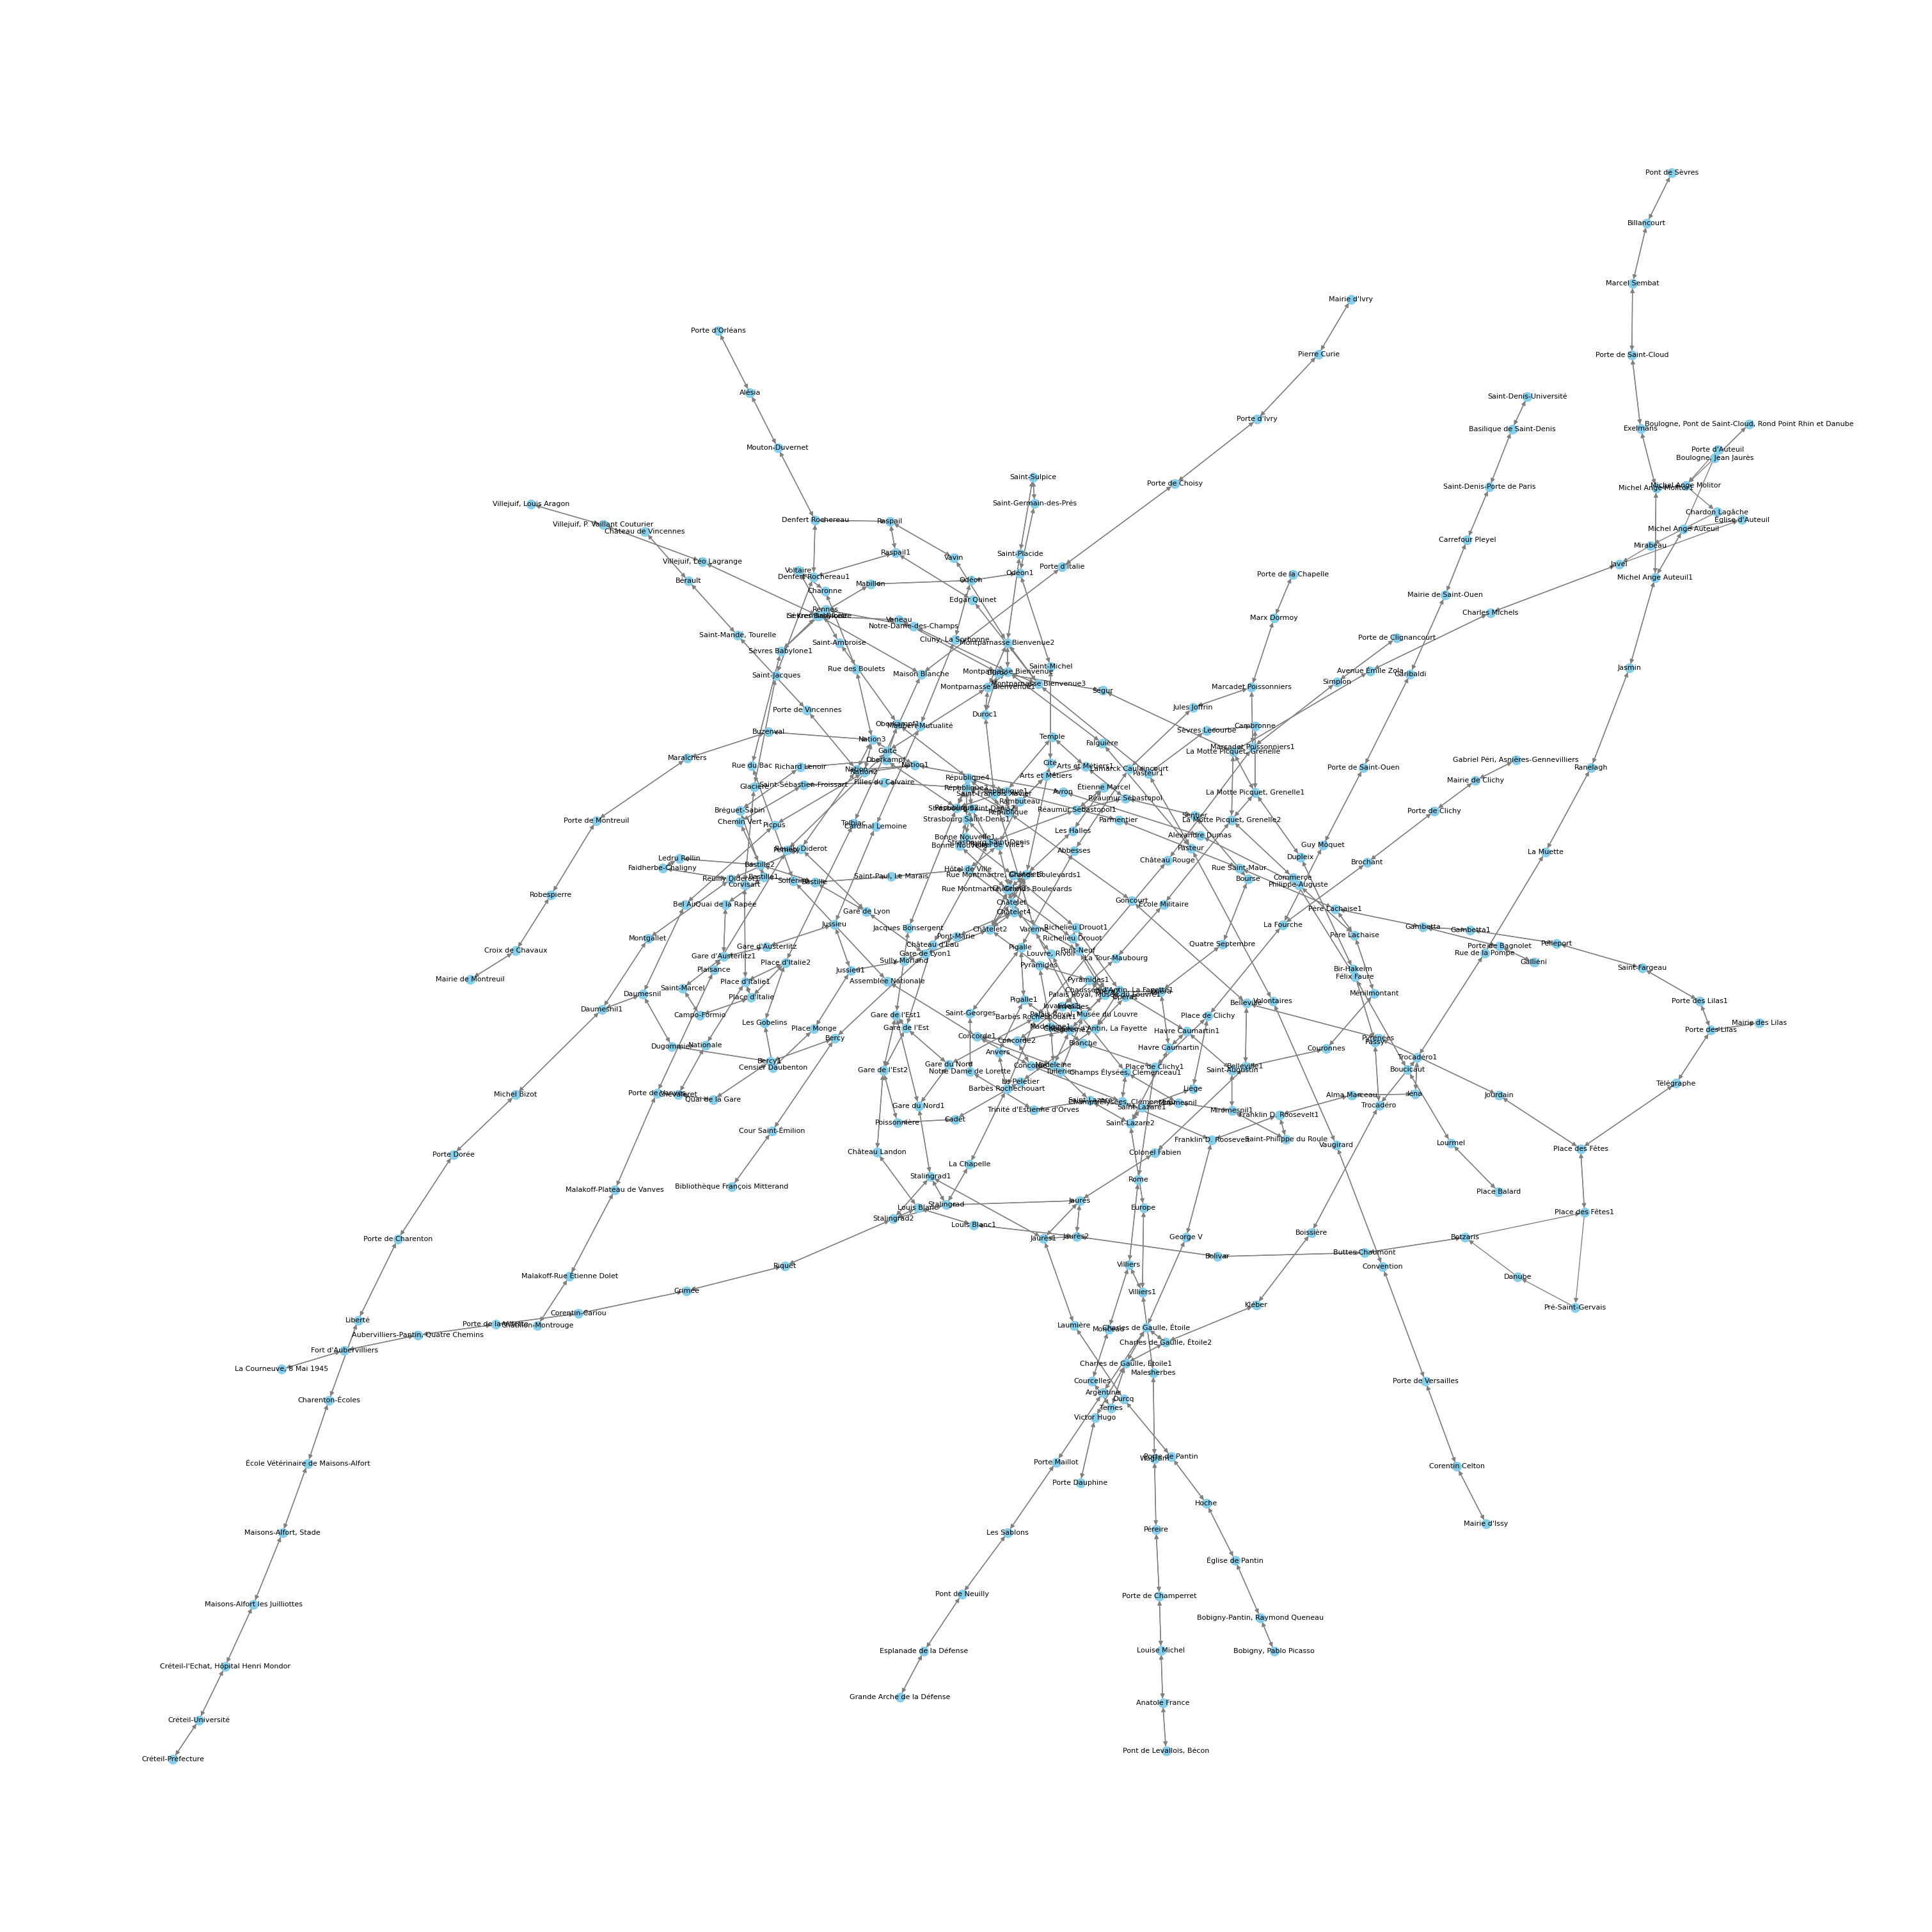

In [ ]:
D=np.load('MetroDict.npy', allow_pickle= True).flat[0] #Dictionnaire des arrêts de Métro dans Paris
M=np.load('MetroMat.npy', allow_pickle =True).tolist()  #Matrice des arrêts de Métro dans Paris


M =np.array(M)
G_metro= nx.DiGraph(M)
D_inv = {v: k for k, v in D.items()}
print(D_inv)
nx.set_node_attributes(G_metro,D_inv, 'station') 

plt.figure(figsize=(30, 30))
nx.draw(G_metro,with_labels=True, labels= nx.get_node_attributes(G_metro, 'station'), node_color='skyblue', edge_color='gray', node_size=100,font_size=13)
plt.axis('off')
plt.show()

Comme nous l'avons évoqué, le graphe n'est pas symétrique. Cependant, pour simplifier notre approche dans un premier temps, nous allons symétriser la matrice afin de pouvoir traiter le graphe comme un graphe non dirigé.  Pour vérifier cette symétrisation n'est pas trop cavalière, nous pouvons compter le nombres d'arcs uniques comme ci-dessous.  


In [ ]:
Diff = M - np.transpose(M)
print(f"Nombres d'arcs uniques: {np.sum(Diff >0)}" )

#Symétrisation
M_sym= (M + np.transpose(M))/2

Nombres d'arcs uniques: 13


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<b style="color:red"> À vous de jouer : </b> En utilisant la matrice d'adjacence pondérée **M** comme référence, complétez l'algorithme de Dijkstra des plus proches voisins. Les parties manquantes sont indiquées par la commande `___line___`, signifiant qu'une ligne entière est absente. Ensuite, utilisez cet algorithme pour calculer le chemin le plus court entre *Jussieu* et *Jules Joffrin*.  

In [17]:
def dijkstra_pcc(M, start, end):
    n = M.shape[0] 
    distances = np.full(n, np.inf)  # Initialize distance function with infinity
    distances[start] = 0  # Distance to start node is 0
    visited = np.zeros(n, dtype=bool)  # Set of already visited nodes
    predecessors = {start: None}  # Track the path during the algorithm
    
    for _ in range(n):
        
        min_distance = np.inf
        current_node = None
        for node in range(n):
            if not visited[node] and distances[node] < min_distance:
                current_node = node
                min_distance = distances[node]
        if current_node is None:
            break  # No more reachable nodes
        
        visited[current_node] = True
        
        for neighbor in range(n):
            weight = M[current_node, neighbor]
            if weight > 0 and not visited[neighbor]:
                new_distance = distances[current_node] + weight
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = current_node
    
    # Reconstruct path
    path = []
    node = end
    while node is not None:
        path.append(node)
        node = predecessors.get(node)
    
    path.reverse()
    return distances[end], path

In [34]:
#PPC Jussieu et Jules JO
distanceJJ, pccJJ = dijkstra_pcc(M, D["Jussieu"], D["Jules Joffrin"])
chemin = [D_inv[idx] for idx in pccJJ]
print(f"Distance ={distanceJJ}")
print(f"Le chemin : {chemin}")

Distance =1036.0
Le chemin : ['Jussieu', 'Cardinal Lemoine', 'Maubert Mutualité', 'Cluny, La Sorbonne', 'Odéon', 'Mabillon', 'Sèvres Babylone', 'Sèvres Babylone1', 'Rue du Bac', 'Solférino', 'Assemblée Nationale', 'Concorde1', 'Madeleine', 'Saint-Lazare', "Trinité d'Estienne d'Orves", 'Notre Dame de Lorette', 'Saint-Georges', 'Pigalle', 'Abbesses', 'Lamarck Caulaincourt', 'Jules Joffrin']


# Clustering de noeuds dans un graphe <a id="part2"></a>

Dans cette deuxième partie du TP, nous abordons la détection de communautés.  Nous allons voir comment utiliser, notamment, la détection de communautés spectrales  et la coupe d'arbre couvrant sur deux jeux de données différents : Le premier porte sur les relations entre les personnages de la saga **Harry Potter**. Le second concerne la cartographie des villes dans **Le Seigneur des Anneaux**.  


## Clustering spectrale des personnages d'Harry Potter <a id="part2sec1"></a>

Pour appliquer pour la première fois le concept de clustering spectral, nous allons utiliser un jeu de données représentant un graphe construit à partir des interactions entre les personnages de l'univers de **Harry Potter**.  Chaque nœud correspond à un personnage. Chaque arête représente une relation entre deux personnages, pondérée par la force (amicale ou stratégique) de leurs interactions dans les livres.  Par exemple, Harry aura une forte connexion avec Ron et Hermione, tandis que Voldemort sera principalement relié à ses Mangemorts, comme Bellatrix Lestrange et Lucius Malfoy.  L'objectif est d'extraire des communautés de personnages basées sur leurs interactions et d'analyser comment les groupes sociaux de la saga se structurent. Le morceau de code ci-dessous construit le graphe. 


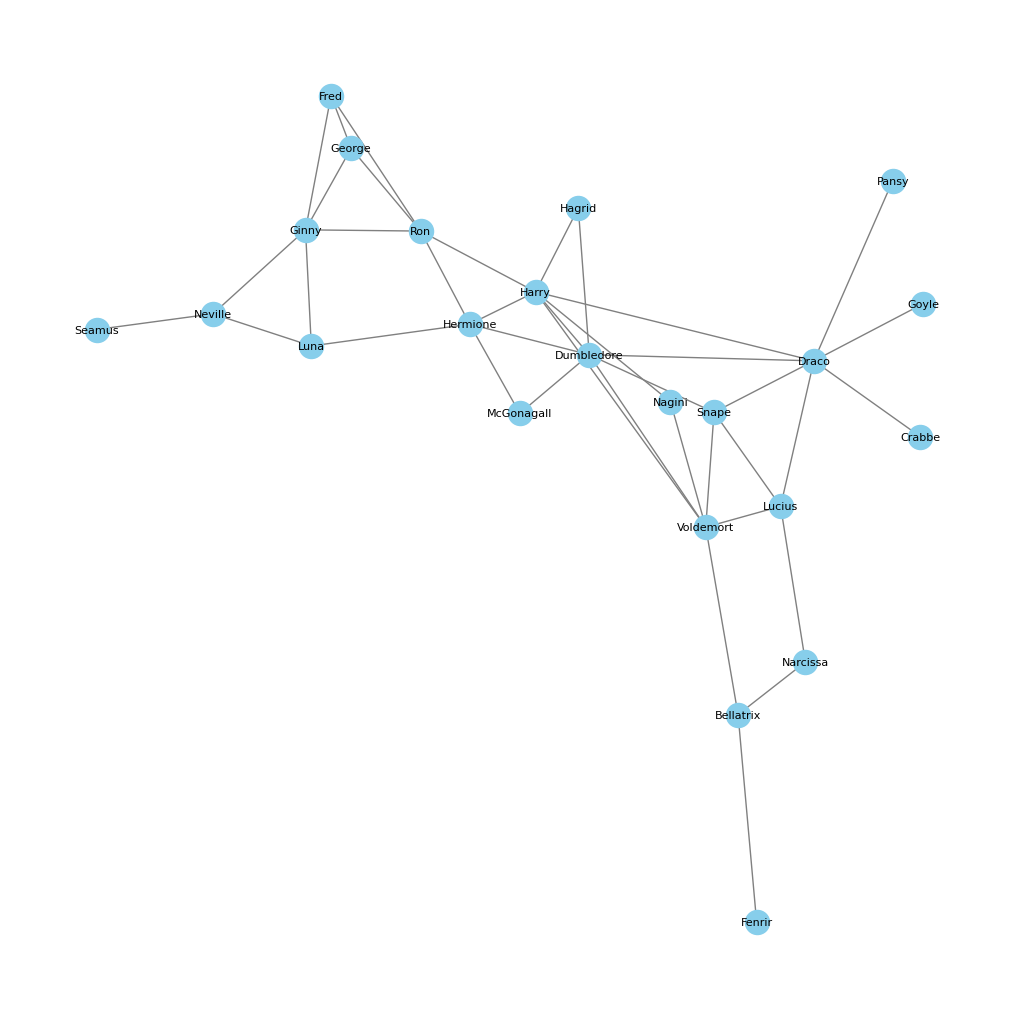

In [35]:
df = pd.read_csv('relations.csv')
n = len(df)
G = nx.Graph()

plt.figure(figsize=(10, 10))
for i in range(n):
    G.add_edge(df.iloc[i]['Personnage_1'], df.iloc[i]['Personnage_2'], weight=df.iloc[i]['Poids']) 

nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=300,font_size=8)
plt.axis('off')
plt.show()

<b style="color:red"> À vous de jouer: </b> En utilisant le graphe **G** de `networkx` défini ci-dessus, construisez la matrice d'adjacence pondérée de ce graphe ainsi que son laplacien normalisé.  Ensuite, en utilisant cette matrice normalisée, implémentez un clustering spectral des personnages afin de regrouper  ceux qui présentent des similarités dans leurs interactions. Nous allons effectuer un clustering spectral pour K = 2, 3, 4. Interprétez les résultats obtenus, si vous avez des connaissances suffisantes sur **Harry Potter** pour les analyser.


In [87]:
from scipy.linalg import sqrtm

#Construction matrice adjacence
n = len(G.nodes)
A = np.zeros((n,n))

dict_HP = {}
for i, perso in enumerate(G.nodes):
    dict_HP[perso] = i

for arrete in G.edges.data() :
    perso1= arrete[0]
    idx_perso1 = dict_HP[perso1]
    perso2= arrete[1]
    idx_perso2 = dict_HP[perso2]
    
    A[idx_perso1][idx_perso2] = arrete[2]['weight']
    A[idx_perso2][idx_perso1] = arrete[2]['weight']

#Matrice dégré
D = np.zeros((n,n))
list_degree_HH = [deg for (node,deg) in G.degree()]
for i in range (n):
    D[i][i] = list_degree_HH[i]

#Laplacien normalisé
Ln = np.eye(n) - sqrtm(D)@A@sqrtm(D)


In [ ]:
from scipy.linalg import eigh

#Clustering spectral
eigenvalues, eigenvectors = eigh(Ln)
K=2
smallest_eigenvectors = eigenvectors[:, :K]  # Les K premiers vecteurs propres



NameError: name 'sqrtm' is not defined

## Clustering spectrale des lieux du seigneur des anneaux <a id="part2sec2"></a>

Pour appliquer pour la première fois le concept de clustering par coupe d'arbre couvrant, nous allons utiliser un jeu de données représentant un graphe géographique basé sur les connexions entre différents lieux emblématiques du Seigneur des Anneaux. Chaque nœud représente un lieu (ex : Minas Tirith, Rivendell, Moria, etc.), et chaque arête indique une route entre deux lieux, pondérée par une distance fictive qui représente une approximation du temps de voyage entre eux. Les clusters ici devrait correspondre aux différentes grandes régions de la Terre du Milieu, par exemple :

- Le Gondor (Minas Tirith, Osgiliath, etc.)
- Le Rohan (Edoras, Helms Deep, etc.)
- Le Mordor (Barad-dûr, Mount Doom, etc.)
- La Comté et les environs (Hobbiton, Bree, etc.)
- Les Terres Elfiques (Rivendell, Lothlórien, etc.)

L'objectif du clustering est d'extraire les différentes régions naturelles ou politiques en segmentant le réseau de transport de la Terre du Milieu. Le morceau de code ci-dessous construit le graphe. 

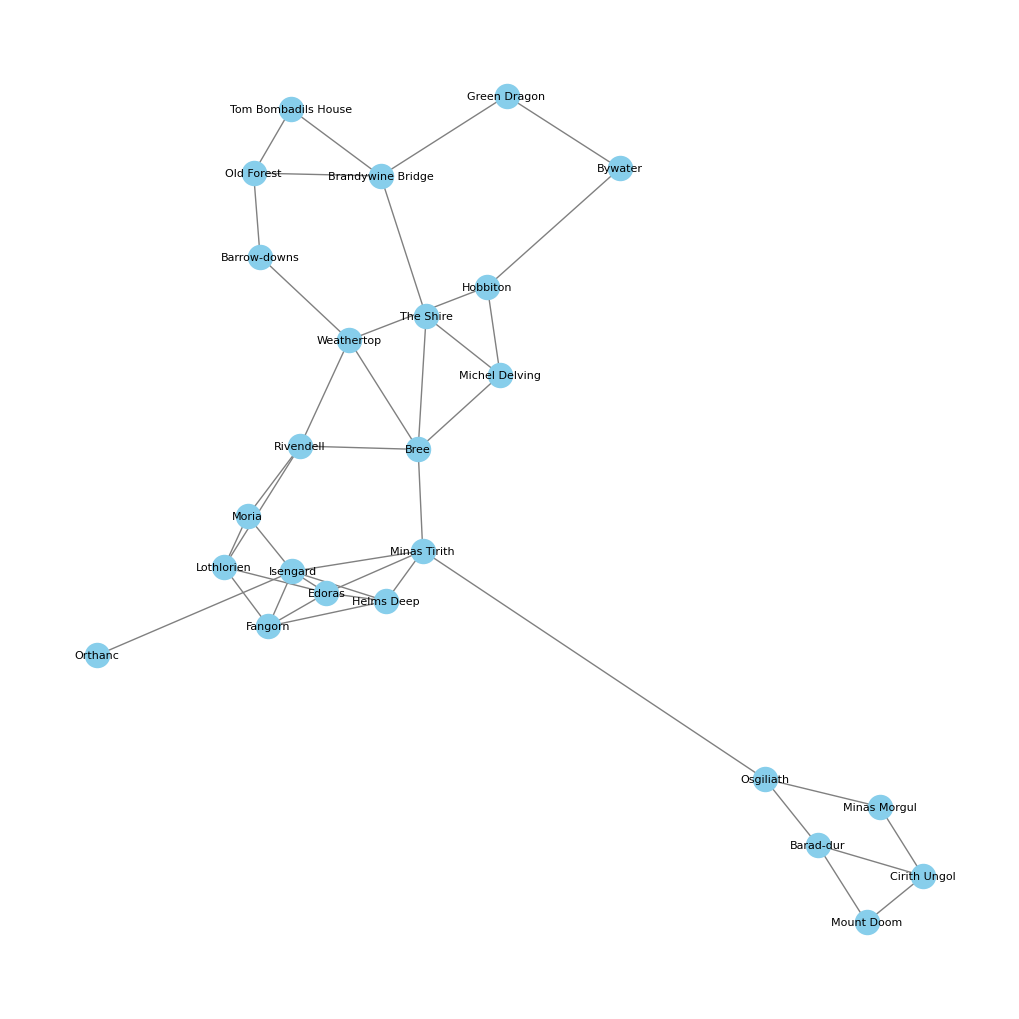

In [9]:
df = pd.read_csv('lotr_routes.csv')
n = len(df)
G = nx.Graph()

for i in range(n):
    G.add_edge(df.iloc[i]['Lieu_1'], df.iloc[i]['Lieu_2'], weight=df.iloc[i]['Distance']) 

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=300,font_size=8)
plt.axis('off')
plt.show()

<b style="color:red"> À vous de jouer: </b> En utilisant le graphe **G** de `networkx` défini ci-dessus et la fonction **minimum_spanning_tree** de ``netwrokx``, construisez un arbre couvrant de poids minimal pour le graphe ci dessus. Puis en utlidant cette arbre, produisez un clustering en $5$ groupes du graphe. Vous pouvez si vous le souhaitez écrire une fonction **decoupe_arbe_couvrant** qui prends en entrée un graph et un nombre de cluster pour rendre cette procédure plus automatique. Commentez. 

<b style="color:red"> Réponse: </b> 

```


<b style="color:red"> Réponse: </b> 

```


# Quelques générations de graphes aléatoires <a id="part3"></a>

Pour conclure ce TP, nous allons générer plusieurs graphes à partir de différents modèles aléatoires. Dans un premier temps, nous construirons simplement des matrices symétriques aléatoires, puis nous utiliserons des méthodes de construction de graphes à partir de matrices de distances pour obtenir différentes structures de graphes.  Ensuite, nous implémenterons les deux modèles de graphes d'**Erdős-Rényi** vus en cours.  



## Transformation d'une matrice aléatoire en graphe <a id="part3sec1"></a>

Nous allons d'abord générer une matrice aléatoire en attribuant simplement des valeurs aléatoires à chaque ligne,  
à l'aide du code ci-dessous.  


In [10]:
n_nodes = 10
matrix = np.random.rand(n_nodes, n_nodes)

**Questions préliminaires :** Cette matrice est-elle a priori symétrique ? Le graphe qu'elle encode (pour lequel elle est une matrice d'adjacence pondérée) comporte-t-il des boucles ?  


<b style="color:red"> À vous de jouer: </b> Assurez-vous que la matrice soit symétrique et éliminez les éventuelles boucles du graphe. 

<b style="color:red"> Réponse: </b> 

```


<b style="color:red"> À vous de jouer: </b> Construisez un graphe de voisinage pour différents niveaux de seuils, et affichez les résultats obtenus. 

<b style="color:red"> Réponse: </b> 

```


## Transformation d'une matrice aléatoire en graphe <a id="part3sec2"></a>


<b style="color:red"> À vous de jouer: </b> Construisez une série de graphe de Erdos Renyi $\mathcal{G}(n,p)$ pour différentes valeurs de $p$, à $n$ fixé. Commentez. Faites de même pour le modèle $\mathcal{G}(n,m)$. 

<b style="color:red"> Réponse: </b> 

```


# Quelques exercices <a id="part4"></a>

## Exercice 1 <a id="part4sec1"></a>

Dans ce premier exercice, nous allons implémenter le modèle de Barabási-Albert afin de générer un graphe, puis analyser la distribution de ses degrés ainsi que sa connexité. L'objectif est de comprendre comment la structure du graphe évolue en fonction du processus de croissance et d'attachement préférentiel. Nous porterons une attention particulière à l'impact du graphe initial sur les résultats obtenus, en étudiant comment le choix des premiers nœuds influence la topologie finale du réseau.

- Implémentez le modèle de *Barabási-Albert* pour générer un graphe.  
- Testez-le avec différents graphes initiaux (vous pouvez en récupérer du TP).  
- Étudiez la distribution des degrés du graphe obtenu.  
- À quel type de graphe vu dans le TP cette distribution correspond-elle ?  
- Étudiez la connexité du graphe en fonction du nombre d'opérations effectuées par l'algorithme.  
- Représentez graphiquement le graphe généré.  
- Commentez les résultats obtenus en fonction du graphe initial.

## Exercice 2 <a id="part4sec2"></a>


Dans cet exercice, nous allons appliquer le clustering spectral sur le jeu de données moons. L'objectif est de construire un graphe de voisinage à partir des données, d'appliquer l'algorithme de clustering spectral et d'analyser la matrice de Laplace normalisée pour identifier une structure en blocs.

- Générez le dataset moons à l'aide de **make_moons** de ``sklearn.datasets``.
- Construisez un graphe de voisinage basé sur la distance entre les points.
- Calculez la matrice de Laplace normalisée associée à ce graphe.
- Appliquez l'algorithme de clustering spectral et représentez les clusters obtenus.
- Réorganisez les lignes et colonnes de la matrice de Laplace pour observer une structure en blocs diagonaux.
- Visualisez graphiquement la matrice réorganisée et interprétez les résultats.


## Exercice 3 <a id="part4sec3"></a>

Dans ce dernier exercice, nous allons implémenter un Stochastic Block Model (SBM) avec trois communautés. L'objectif est de générer un graphe synthétique suivant ce modèle, puis d'appliquer une méthode de clustering basée sur l'algorithme variationnel EM afin d'identifier les communautés sous-jacentes. 

- Implémentez un Stochastic Block Model (SBM) avec trois communautés en utilisant ``networkx`` ou ``numpy``.
- Visualisez le graphe généré pour observer la structure des communautés.
- Visualisez la matrice d'adjacence réarrangée pour observer une structure en blocs en fonciton des communautés. 
